# 1. Introduction

This data contains information pertaining to buildings that were damaged in the 2015 Gorkha Earthquake in Nepal. Using the features provided such as their building location, construction material of the housing and purpose of housing, we intend to gain a better understanding of the type of data that would be useful in helping us to predict the level of damage to buildings, create a model from the data to predict the buildings that are more susceptible, and finally come up with a guideline regarding the best way buildings can become less prone to damage during an Earthquake.

# 2. Importing necessary libraries 

In [3]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# 3. Importing the dataset and creating a Dataframe


In [4]:
# import data and labels
data=pd.read_csv("train_values_final.csv")
labels1 = pd.read_csv("train_labels_final.csv")
labels = labels1.drop("building_id", axis=1)
# create a Pandas Dataframe including labels
df = pd.concat([data, labels], axis=1, sort=False)

df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


# 4. Exploratory Data Analysis

### First, we get basic statistics from the dataset.

Get important statistics on the count, mean, standard deviation, quartiles.

In [4]:
df.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


Get information on the data types and size of dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

**We plot a correlation matrix to identify which variables are the most correlated to damage grade and thus most relevant to identifying the damage grade of the building**

<AxesSubplot:>

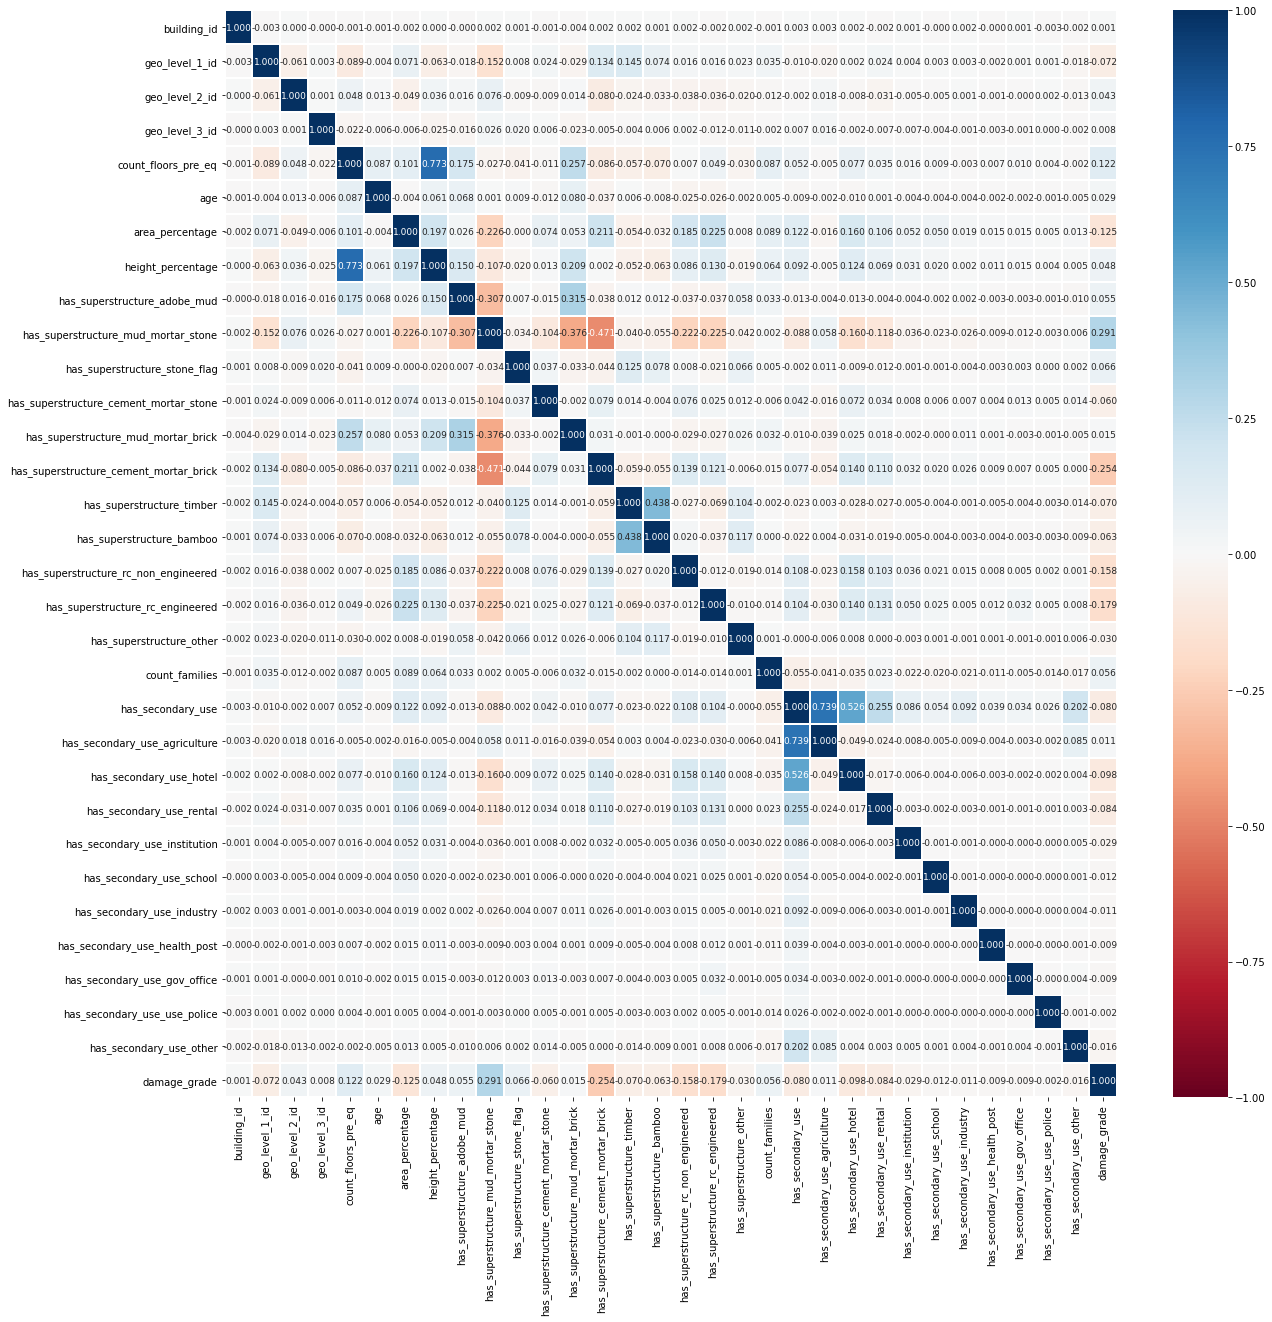

In [6]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(df.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".3f", annot_kws = {"size": 9}, cmap = "RdBu") #fmt -- decimal places 2

However, we can see that all the variables actually have extremely low correlation scores with damage grade. We have to use other methods to learn more about the features and identify the ones that will help us in finding out the damage grade of the building.

### Secondly, we try to see if there is a pattern between Geo ID and amount of damaged buildings.

In other words, we are trying to see if there is a particular range of Geo IDs which have a greater number of buildings that are damaged, or are proportionately more damaged than in other areas. 

Firstly, we divide the dataframe into 3 based on damage grade.

In [7]:
df1 = df.loc[(df.damage_grade == 1), ['geo_level_1_id','geo_level_2_id','geo_level_3_id']]
df2 = df.loc[(df.damage_grade == 2), ['geo_level_1_id','geo_level_2_id','geo_level_3_id']] 
df3 = df.loc[(df.damage_grade == 3), ['geo_level_1_id','geo_level_2_id','geo_level_3_id']]

Then, we plot out frequency for each damage level vs Geolevel ID, for each Geolevel.

D:\ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

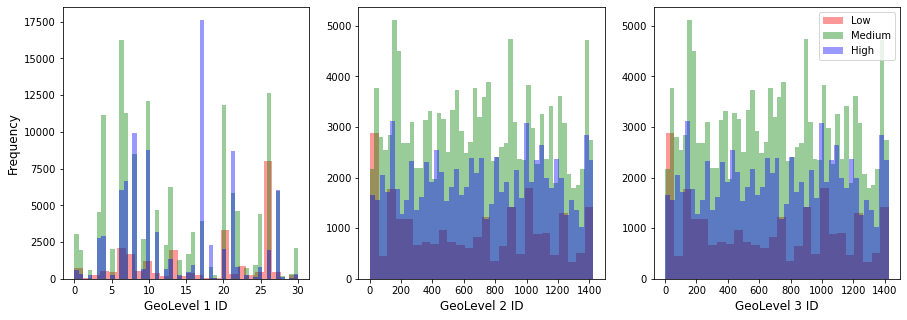

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sb.distplot(df1['geo_level_1_id'], kde = False, label = 'Low', color = 'red', ax = axes[0])
sb.distplot(df2['geo_level_1_id'], kde = False, label = 'Medium', color = 'green', ax = axes[0])
sb.distplot(df3['geo_level_1_id'], kde = False, label = 'High', color = 'blue', ax = axes[0])

sb.distplot(df1['geo_level_2_id'], kde = False, label = 'Low', color = 'red', ax = axes[1])
sb.distplot(df2['geo_level_2_id'], kde = False, label = 'Medium', color = 'green', ax = axes[1])
sb.distplot(df3['geo_level_2_id'], kde = False, label = 'High', color = 'blue', ax = axes[1])

sb.distplot(df1['geo_level_2_id'], kde = False, label = 'Low', color = 'red', ax = axes[2])
sb.distplot(df2['geo_level_2_id'], kde = False, label = 'Medium', color = 'green', ax = axes[2])
sb.distplot(df3['geo_level_2_id'], kde = False, label = 'High', color = 'blue', ax = axes[2])


plt.legend(prop={'size':10})
axes[0].set_xlabel('GeoLevel 1 ID', fontsize=12)
axes[1].set_xlabel('GeoLevel 2 ID', fontsize=12)
axes[2].set_xlabel('GeoLevel 3 ID', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

We are not provided with information on how these GEOIDs are produced, and we hypothesized them to be the entire map cut up into smaller squares. Hence, We tried to cut the GEOIDs in intervals to identify the repeating pattern through a particular range (i.e. locality on the map) where more buildings are damaged/proportionately more damaged (i.e. epicentre of the earthquake). 

We try to guess the number of IDs before a repeating pattern occurs, for Geo Level ID = 1. We first try number = 8, and plot the density of building damage for each Geo Level 1 ID.

In subsequent cells, we try different values of x, and different Geo Levels.

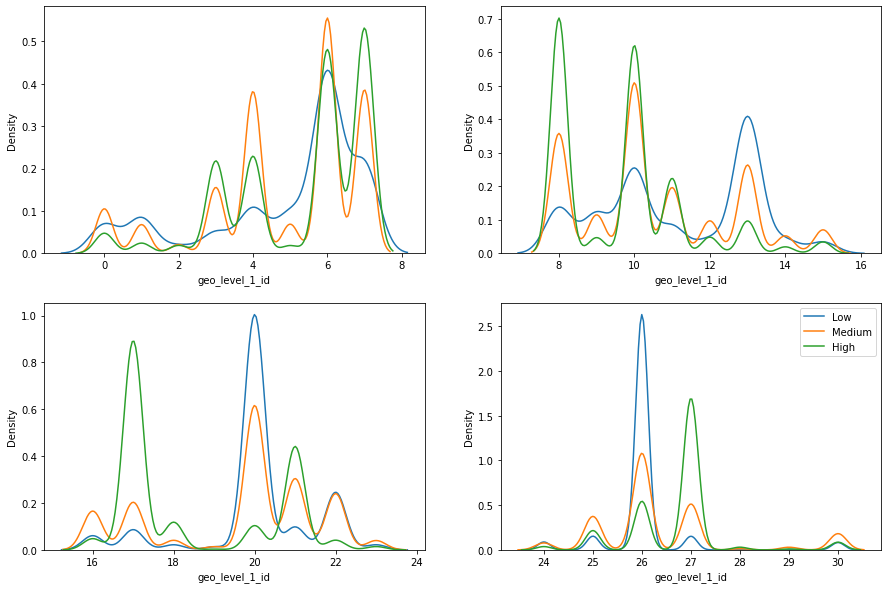

In [9]:
# x = 8 and Geo Level 1 ID
x = 8
splits = int(np.ceil(30/(2*x)))

fig, axes = plt.subplots(2, splits, figsize=(15, 10))
for i in range(splits):
    sb.kdeplot(df1[(df1['geo_level_1_id']>=(x*(i))) & (df1['geo_level_1_id']<(x*(i+1)))]['geo_level_1_id'], bw_adjust = 1, label = 'Low', ax = axes[0,i])
    sb.kdeplot(df2[(df2['geo_level_1_id']>=(x*(i))) & (df2['geo_level_1_id']<(x*(i+1)))]['geo_level_1_id'], bw_adjust = 1, label = 'Medium', ax = axes[0,i])
    sb.kdeplot(df3[(df3['geo_level_1_id']>=(x*(i))) & (df3['geo_level_1_id']<(x*(i+1)))]['geo_level_1_id'], bw_adjust = 1, label = 'High', ax = axes[0,i])
        
for i in range(splits, (2*splits)):
    sb.kdeplot(df1[(df1['geo_level_1_id']>=(x*(i))) & (df1['geo_level_1_id']<(x*(i+1)))]['geo_level_1_id'], bw_adjust = 1, label = 'Low', ax = axes[1,(i-splits)])
    sb.kdeplot(df2[(df2['geo_level_1_id']>=(x*(i))) & (df2['geo_level_1_id']<(x*(i+1)))]['geo_level_1_id'], bw_adjust = 1, label = 'Medium', ax = axes[1,(i-splits)])
    sb.kdeplot(df3[(df3['geo_level_1_id']>=(x*(i))) & (df3['geo_level_1_id']<(x*(i+1)))]['geo_level_1_id'], bw_adjust = 1, label = 'High', ax = axes[1,(i-splits)])

plt.legend(prop={'size':10})

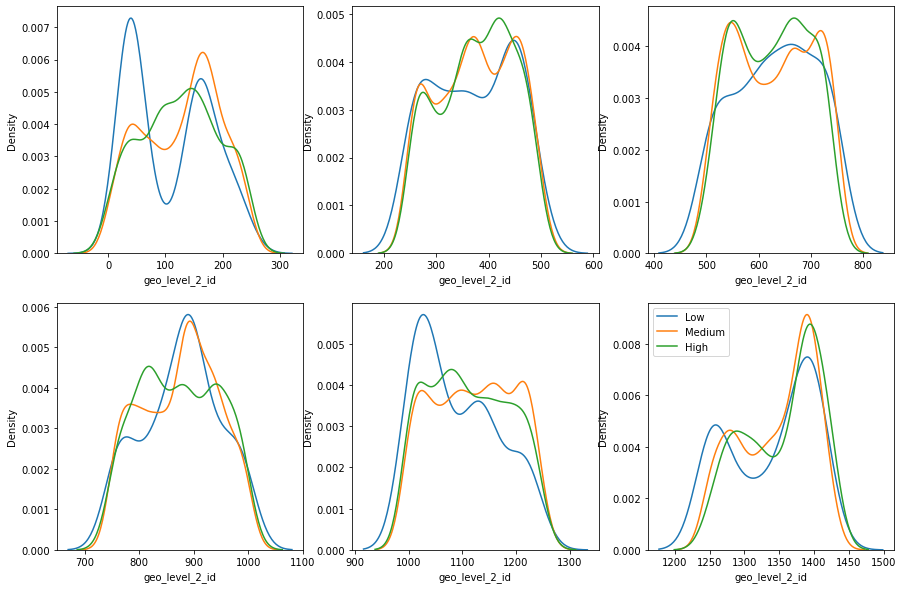

In [10]:
# x = 250 and Geo Level 2
x = 250
splits = int(np.ceil(1427/(2*x)))

fig, axes = plt.subplots(2, splits, figsize=(15, 10))
for i in range(splits):
    sb.kdeplot(df1[(df1['geo_level_2_id']>=(x*(i))) & (df1['geo_level_2_id']<(x*(i+1)))]['geo_level_2_id'], bw_adjust = 2, label = 'Low', ax = axes[0,i])
    sb.kdeplot(df2[(df2['geo_level_2_id']>=(x*(i))) & (df2['geo_level_2_id']<(x*(i+1)))]['geo_level_2_id'], bw_adjust = 2, label = 'Medium', ax = axes[0,i])
    sb.kdeplot(df3[(df3['geo_level_2_id']>=(x*(i))) & (df3['geo_level_2_id']<(x*(i+1)))]['geo_level_2_id'], bw_adjust = 2, label = 'High', ax = axes[0,i])
        
for i in range(splits, (2*splits)):
    sb.kdeplot(df1[(df1['geo_level_2_id']>=(x*(i))) & (df1['geo_level_2_id']<(x*(i+1)))]['geo_level_2_id'], bw_adjust = 2, label = 'Low', ax = axes[1,(i-splits)])
    sb.kdeplot(df2[(df2['geo_level_2_id']>=(x*(i))) & (df2['geo_level_2_id']<(x*(i+1)))]['geo_level_2_id'], bw_adjust = 2, label = 'Medium', ax = axes[1,(i-splits)])
    sb.kdeplot(df3[(df3['geo_level_2_id']>=(x*(i))) & (df3['geo_level_2_id']<(x*(i+1)))]['geo_level_2_id'], bw_adjust = 2, label = 'High', ax = axes[1,(i-splits)])

plt.legend(prop={'size':10})

No handles with labels found to put in legend.


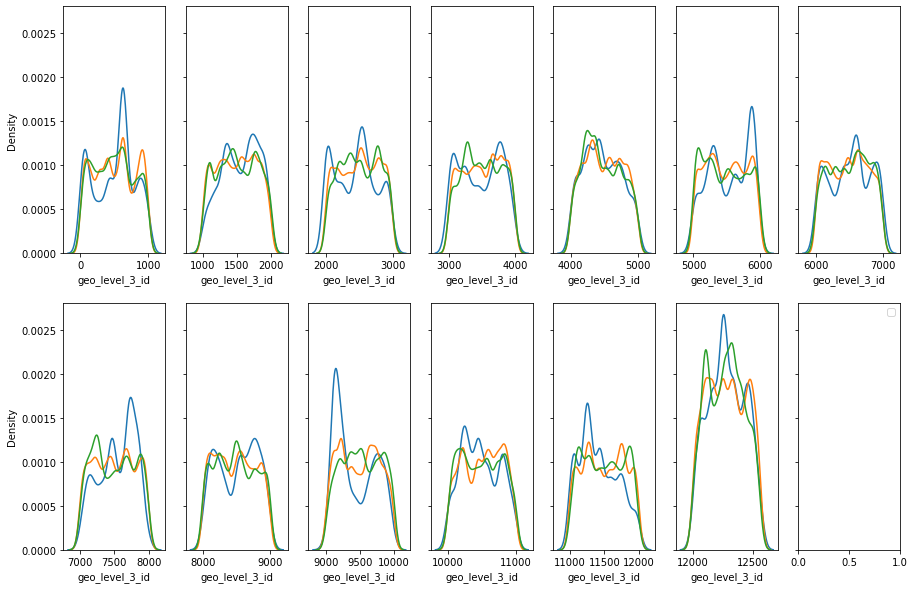

In [11]:
# x = 1000 and Geo Level 3
x = 1000
splits = int(np.ceil(12567/(2*x)))

fig, axes = plt.subplots(2, splits, figsize=(15, 10), sharey = True)
for i in range(splits):
    sb.kdeplot(df1[(df1['geo_level_3_id']>=(x*(i))) & (df1['geo_level_3_id']<(x*(i+1)))]['geo_level_3_id'], bw_adjust = 1, label = 'Low', ax = axes[0,i])
    sb.kdeplot(df2[(df2['geo_level_3_id']>=(x*(i))) & (df2['geo_level_3_id']<(x*(i+1)))]['geo_level_3_id'], bw_adjust = 1, label = 'Medium', ax = axes[0,i])
    sb.kdeplot(df3[(df3['geo_level_3_id']>=(x*(i))) & (df3['geo_level_3_id']<(x*(i+1)))]['geo_level_3_id'], bw_adjust = 1, label = 'High', ax = axes[0,i])
        
for i in range(splits, (2*splits)):
    sb.kdeplot(df1[(df1['geo_level_3_id']>=(x*(i))) & (df1['geo_level_3_id']<(x*(i+1)))]['geo_level_3_id'], bw_adjust = 1, label = 'Low', ax = axes[1,(i-splits)])
    sb.kdeplot(df2[(df2['geo_level_3_id']>=(x*(i))) & (df2['geo_level_3_id']<(x*(i+1)))]['geo_level_3_id'], bw_adjust = 1, label = 'Medium', ax = axes[1,(i-splits)])
    sb.kdeplot(df3[(df3['geo_level_3_id']>=(x*(i))) & (df3['geo_level_3_id']<(x*(i+1)))]['geo_level_3_id'], bw_adjust = 1, label = 'High', ax = axes[1,(i-splits)])

plt.legend(prop={'size':10})

We can see from above that there is no clear repeating pattern if we overlay the 4 graphs. This process was repeated for other x values and there still no clear repeating pattern. However, we can still see that at certain Geo IDs, there are spikes in damage levels, and so we can conclude that Geo Level IDs are useful to our models prediction.

### Third, we try to see the relation between age and damage sustained.

We  try to plot out the distribution of buildings by age and damage sustained.

99.18 % of buildings are below 100 years of age


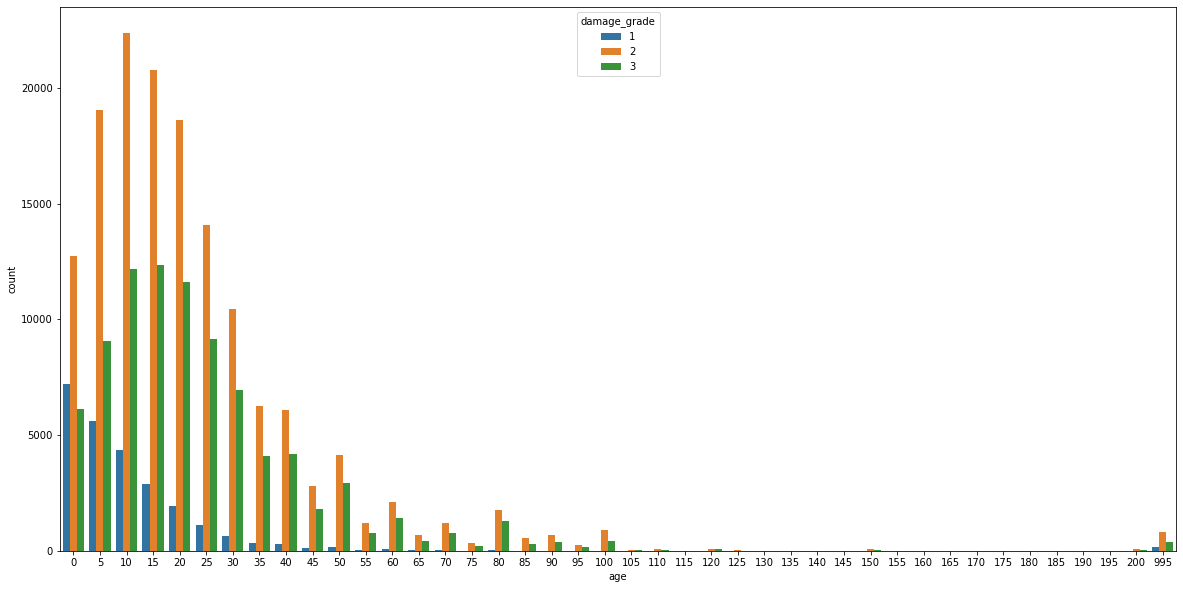

In [12]:
#Visualizing a countplot for all damage grades across all ages
data1 = pd.DataFrame(df[["damage_grade","age"]])
f = plt.figure(figsize=(20, 10))
sb.countplot(x="age",data=data1,hue="damage_grade")

filt=df['age']<=100
data=df[filt]

# Find % of buildings below 100 years of age
p=len(data["age"])/len(df["age"])*100
print(str(round(p,2)),'% of buildings are below 100 years of age')

We can see 99.2% of buildings are below 100 years of age, so we shall focus on these to identify any observable trends. 

We then normalise the data for every age, so we can get a representative visualisation of damage per age group.

<AxesSubplot:title={'center':'Type of damage by age of buildings'}, xlabel='age'>

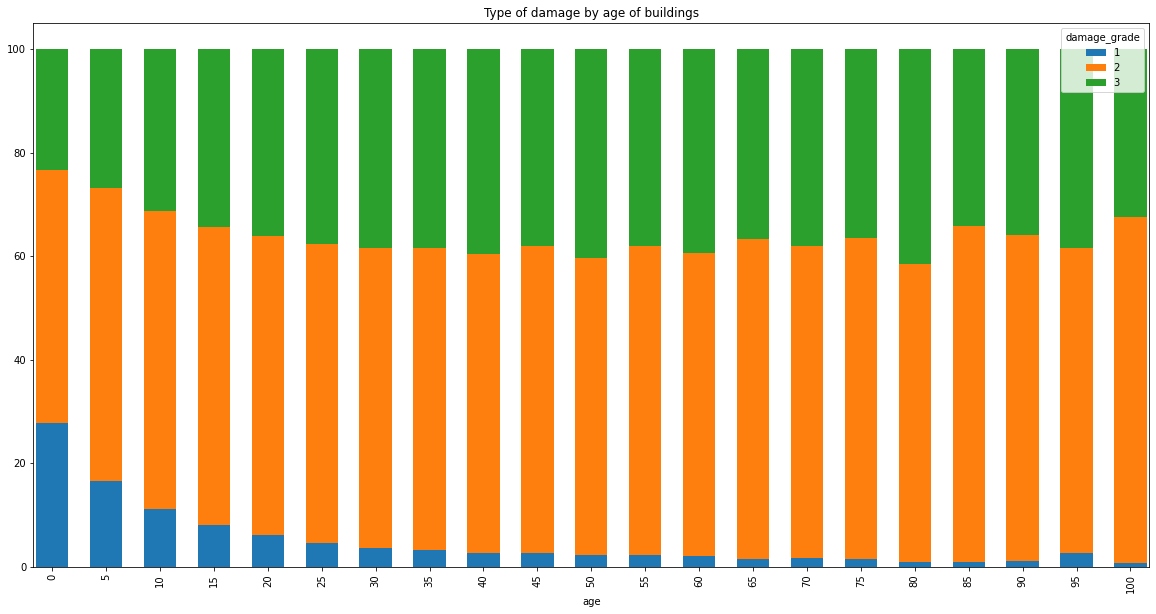

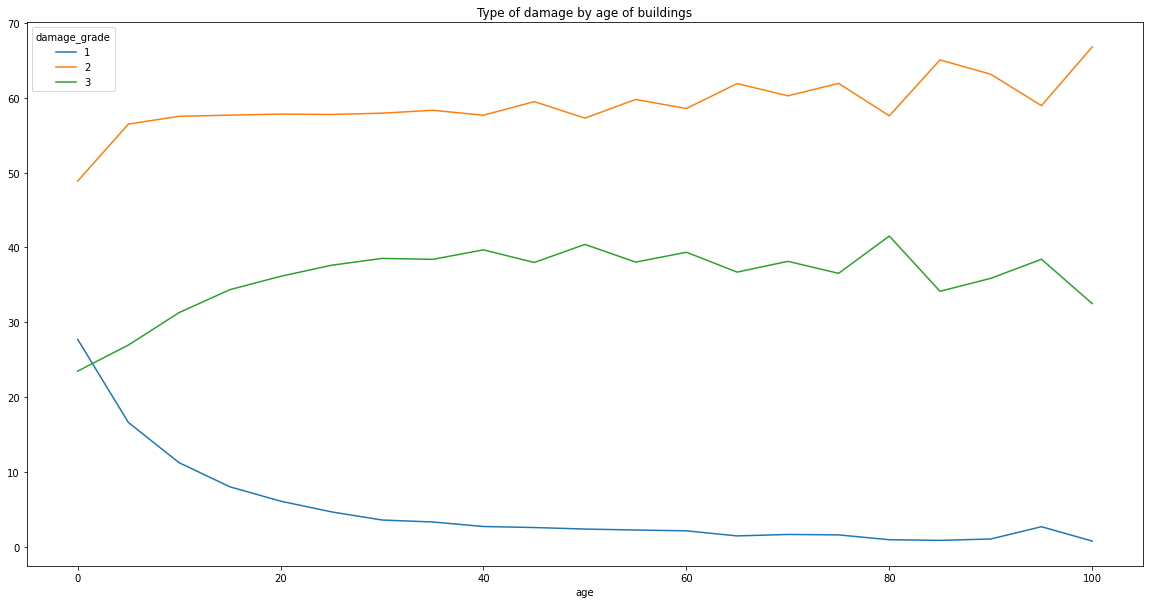

In [13]:
#Using crosstab to plot out normalised percentages
dataCrosstab = pd.crosstab([data.age],[data.damage_grade], normalize = 'index')*100
dataCrosstab.plot(kind='bar',stacked=True,title='Type of damage by age of buildings', figsize = (20,10),width = 3)
dataCrosstab.plot(kind='line',title='Type of damage by age of buildings', figsize = (20,10))

Here we see the trend that as age increases, buildings have increasing percentage of damage 2 & 3 grades. This shows that as age increases, we have a positive relationship with damage.

### Fourth, we try to see the relationship between area percentage/height percentage with damage grade. 

To start, we try to visualise the relationship between area percentage and damage. We first show unnormalised area percentage data and then normalise it to get a more representative distribution.

Text(0.5, 0, 'Area Percentage of Damage of buildings')

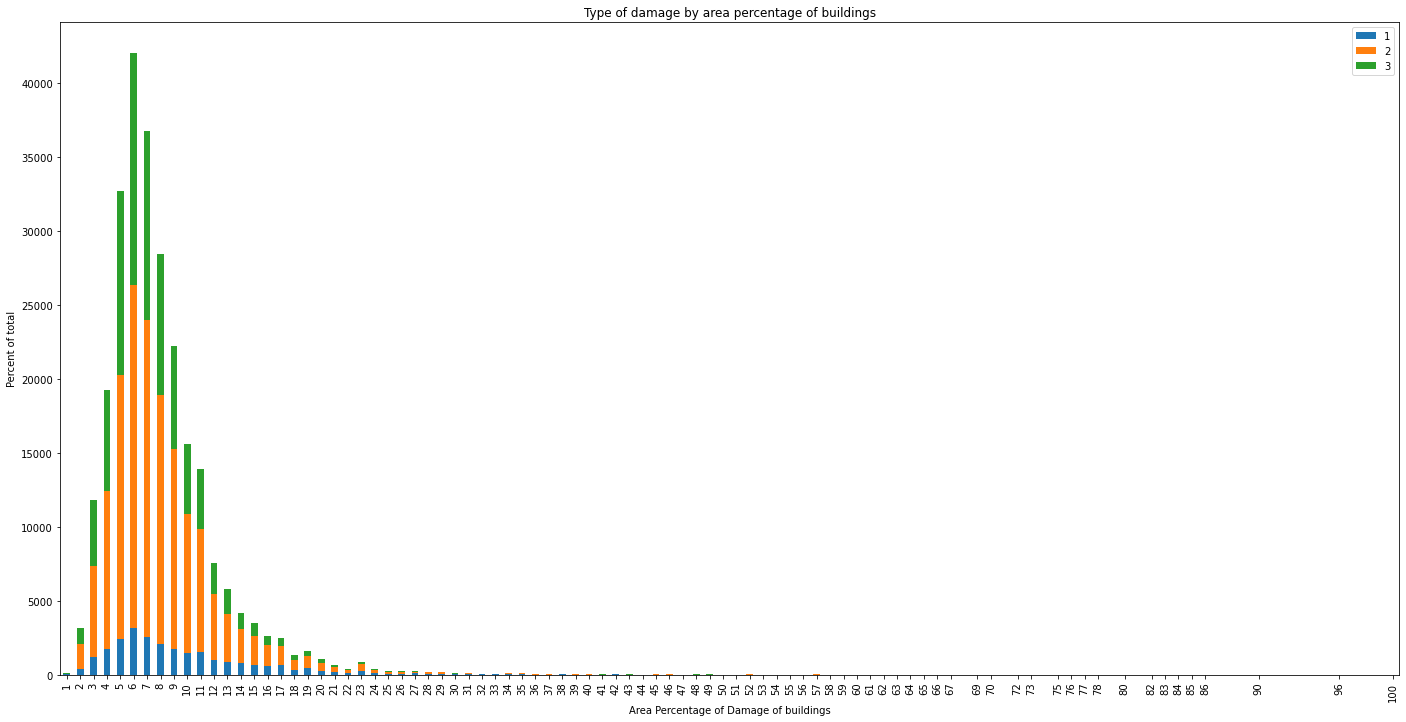

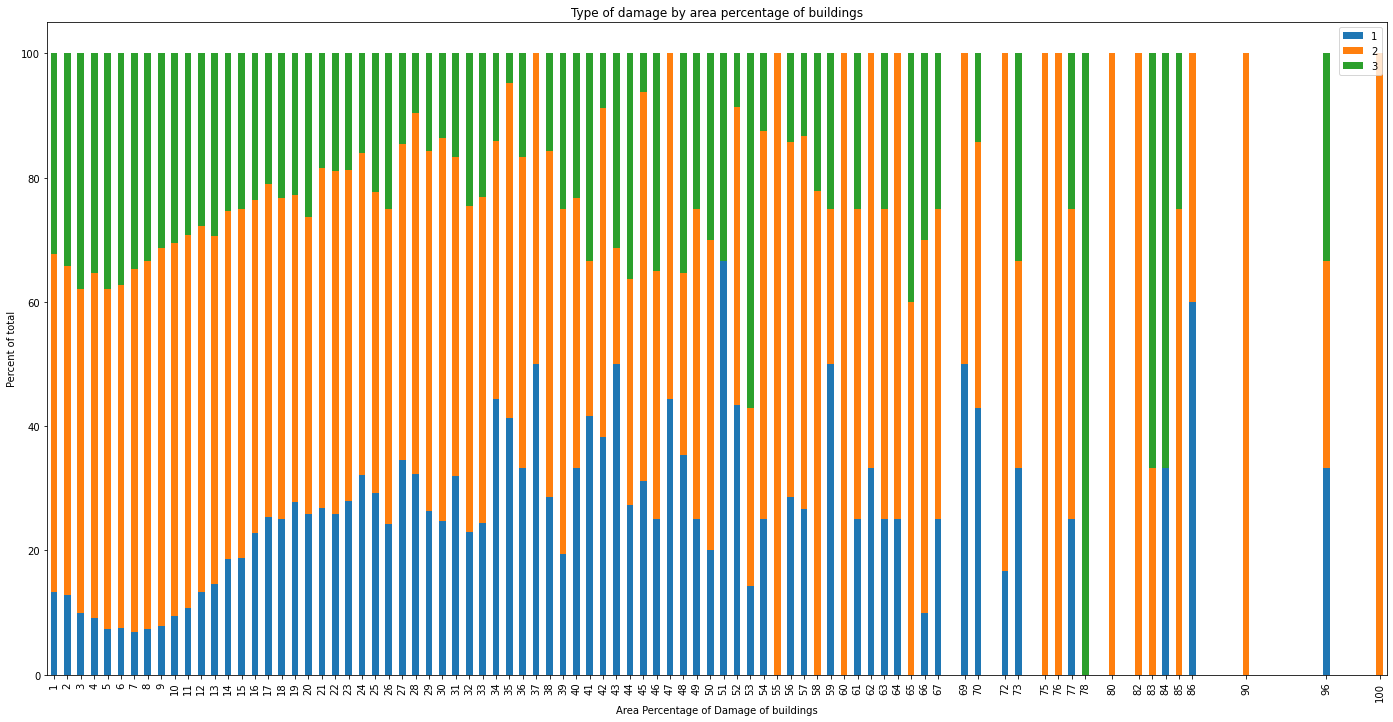

In [14]:
#Create a crosstab - this step is required to get data in the format suitable for required type of chart
dataCrosstab = pd.crosstab(df['area_percentage'],df['damage_grade'])

# Plot the data and set labels
dataCrosstab.plot(kind='bar',stacked=True,figsize = (24,12), title='Type of damage by area percentage of buildings');
plt.legend(loc='best')
plt.ylabel('Percent of total')
plt.xlabel('Area Percentage of Damage of buildings')

# Repeat the above two steps to obtain noramalised data.
dataCrosstab = pd.crosstab(df['area_percentage'],df['damage_grade'], normalize = 'index')*100
dataCrosstab.plot(kind='bar',stacked=True,figsize = (24,12), title='Type of damage by area percentage of buildings');
plt.legend(loc='best')
plt.ylabel('Percent of total')
plt.xlabel('Area Percentage of Damage of buildings')

Based on the unnormalised data, there is an uneven distribution, which explains the inconsistent damage grade from AP - 30% onwards. The normalised data for area percentage shows as the AP increases, it will be less susceptible to damage level 2 & 3.

We repeat the same process as above, but using height percentage instead of area percentage.

Text(0.5, 0, 'Height Percentage of Damage of buildings')

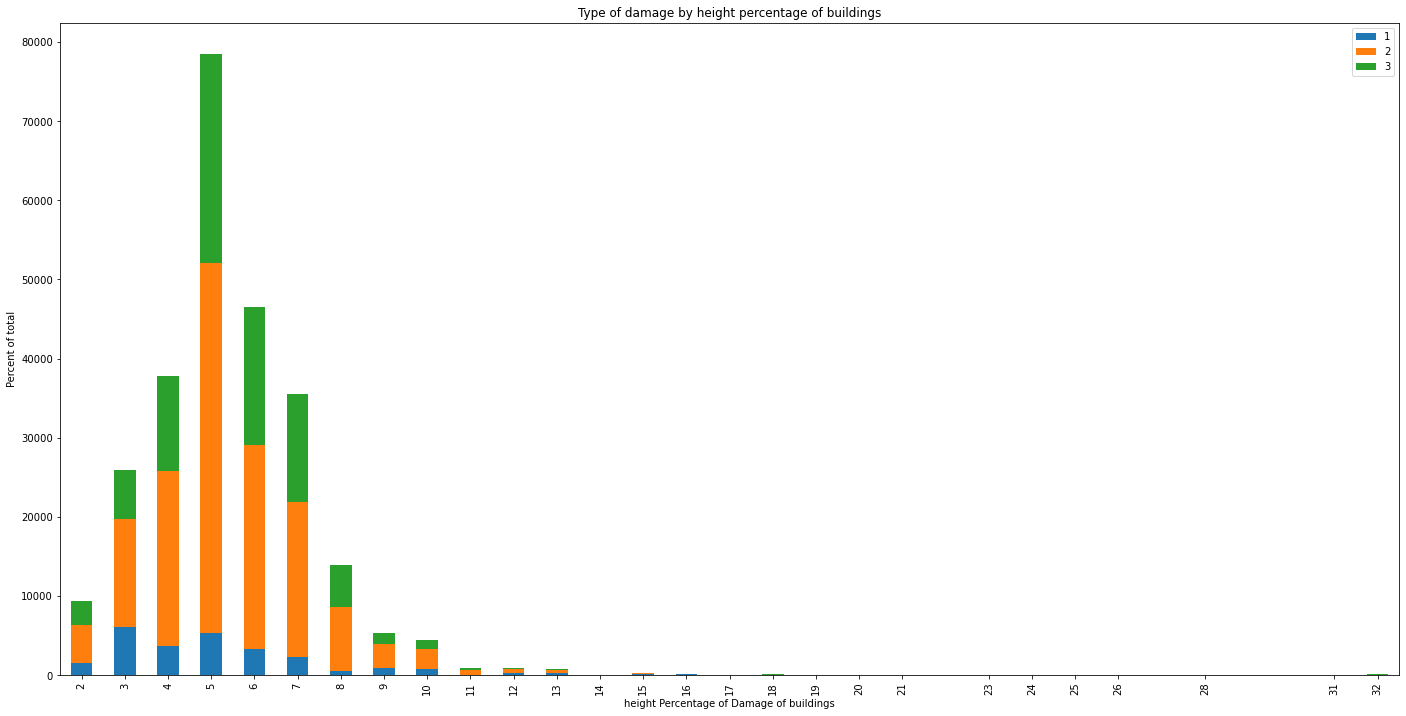

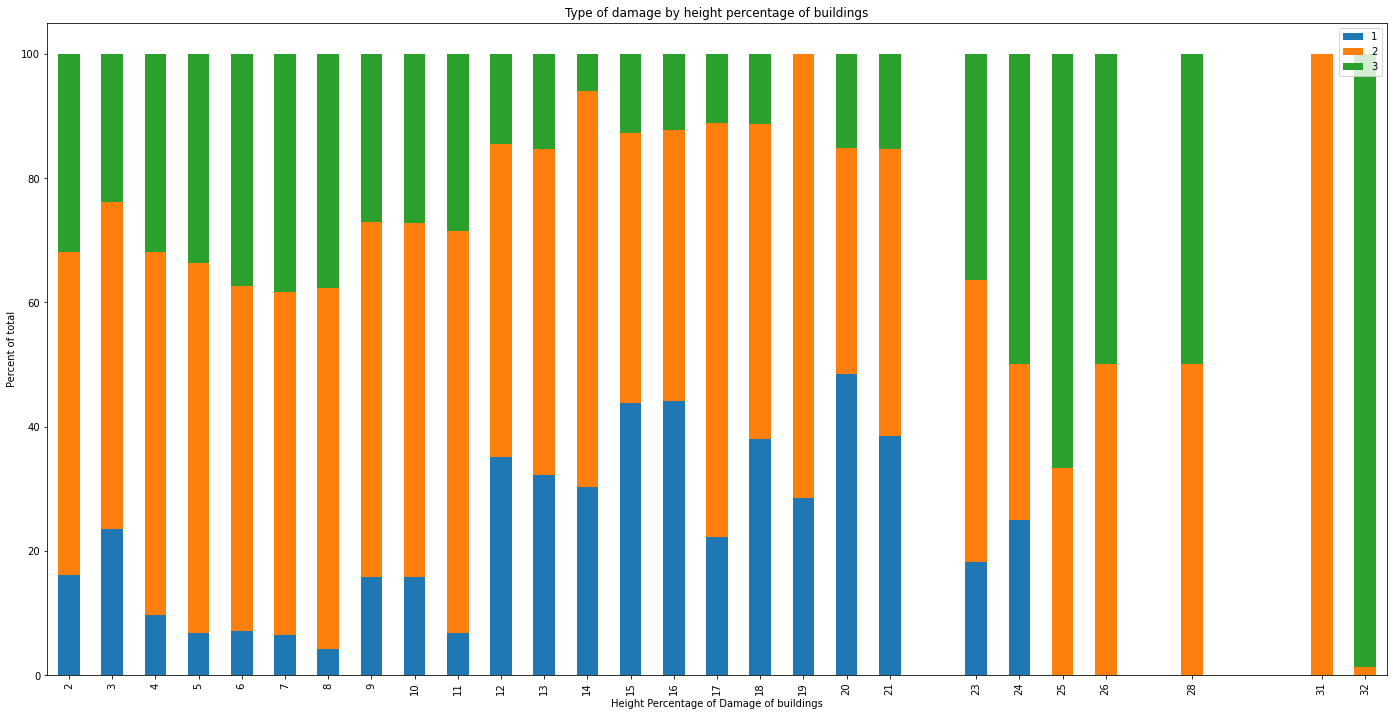

In [15]:
#Create a crosstab - this step is required to get data in the format suitable for required type of chart
dataCrosstab = pd.crosstab(df['height_percentage'],df['damage_grade'])

# Plot the data and set labels
dataCrosstab.plot(kind='bar',stacked=True,figsize = (24,12), title='Type of damage by height percentage of buildings');
plt.legend(loc='best')
plt.ylabel('Percent of total')
plt.xlabel('height Percentage of Damage of buildings')

# Repeat the above two steps to obtain noramalised data.
dataCrosstab = pd.crosstab(df['height_percentage'],df['damage_grade'], normalize = 'index')*100
dataCrosstab.plot(kind='bar',stacked=True,figsize = (24,12), title='Type of damage by height percentage of buildings');
plt.legend(loc='best')
plt.ylabel('Percent of total')
plt.xlabel('Height Percentage of Damage of buildings')

For buildings above 20% height percentage, we can see a general increasing trend in level 2 and 3 damage, while level 1 damage reduces to 0.

### Fifth, we try to see if there is any relation between categorical variables and damage grade.

There are 8 categorical variables. Below, we try to obtain the general distribution of damage grades for each class of each of the 8 variables.

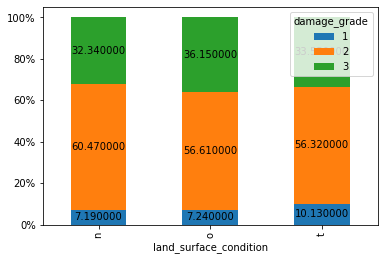

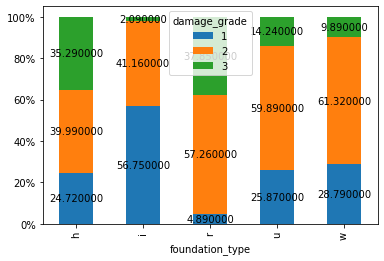

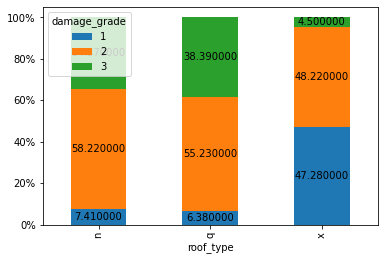

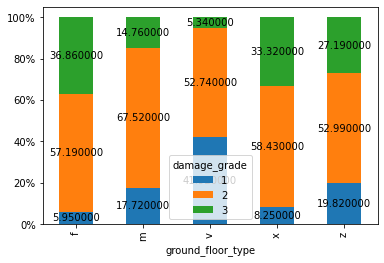

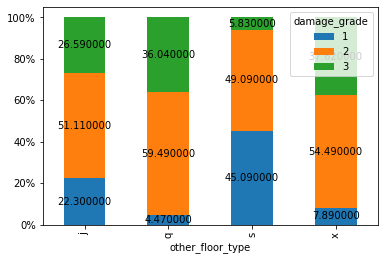

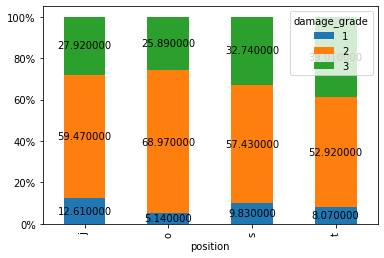

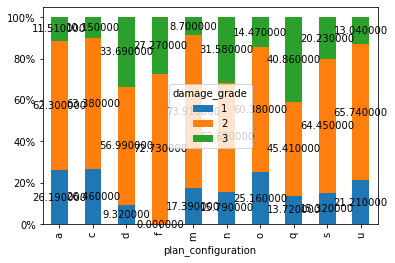

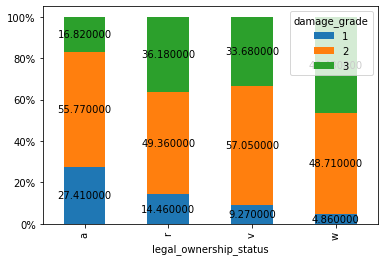

In [16]:
cat_var = ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type','other_floor_type','position', 'plan_configuration', 'legal_ownership_status']
i=1
for var in cat_var:
    graph = df.groupby([var,'damage_grade']).size().groupby(level=0).apply(
        lambda x: 100 * x / x.sum()
    ).unstack().plot(kind='bar',stacked=True)
    for rect in graph.patches:
        graph.text(rect.get_x() + rect.get_width() / 2.,
                rect.get_y() + rect.get_height() / 2.,
                '%f'%(round(rect.get_height(),2)),
                ha = 'center',
                va = 'center')
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.show()

We can hence see that the 'land_surface_condition' and 'position' variable should be eliminated from the dataset because the distribution of damage grades for each class in these 2 variables are roughly the same. This indicates to us that these categorical variables would not be helpful to us in predicting the damage grade of a particular variable. In comparison, we can see from variables such as foundation_type, that certain classes would result in a much higher percentage of damage grade (e.g. foundation_type = r).

### Sixth, we analyse the relationship between the 'has_superstructure' variables and damage grade.

To start, we create a dataframe to show the number of buildings in each structure and their proportionate damage levels.

In [17]:
# Creating new Dataframe specifically for building types
building_type = pd.DataFrame(df[['has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other', 'damage_grade']])
building_type.head()


,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
0,1,0,0,0,0,0,0,0,0,0,3
1,1,0,0,0,0,0,0,0,0,0,2
2,1,0,0,0,0,0,0,0,0,0,3
3,1,0,0,0,0,1,1,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,3


In [18]:
superstucture_label = {'has_superstructure_mud_mortar_stone':0,
                       'has_superstructure_stone_flag':1,
                       'has_superstructure_cement_mortar_stone':2,
                       'has_superstructure_mud_mortar_brick':3,
                       'has_superstructure_cement_mortar_brick':4, 
                       'has_superstructure_timber':5,
                       'has_superstructure_bamboo':6, 
                       'has_superstructure_rc_non_engineered':7,
                       'has_superstructure_rc_engineered':8, 
                       'has_superstructure_other':9}
damage_1 = []
damage_2 = []
damage_3 = []


for var in superstucture_label:
    building_structure_df = building_type[building_type[var] == 1]
    damage_1.append(len(building_structure_df[building_structure_df['damage_grade']== 1]))
    damage_2.append(len(building_structure_df[building_structure_df['damage_grade']== 2]))
    damage_3.append(len(building_structure_df[building_structure_df['damage_grade']== 3]))
    
display(damage_1,damage_2,damage_3)


# Creating the new DataFrame (Damage against Structure)
Structure_Damage = pd.DataFrame(np.array([damage_1, damage_2, damage_3]),
                   columns=['has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
                            'has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick',
                            'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
                            'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
                            'has_superstructure_rc_engineered', 'has_superstructure_other'])

Structure_Damage_t = Structure_Damage.T
Structure_Damage_t.rename(columns={0: "Damage 1", 1: "Damage 2", 2: "Damage 3"} , inplace = True)
Structure_Damage_t

[8760, 182, 829, 623, 7105, 7642, 2839, 3857, 2656, 656]

[113947, 4534, 3248, 11698, 11421, 40187, 14001, 5832, 1402, 2248]

[75854, 4231, 675, 5440, 1089, 18621, 5314, 1410, 75, 1001]

,Damage 1,Damage 2,Damage 3
has_superstructure_mud_mortar_stone,8760,113947,75854
has_superstructure_stone_flag,182,4534,4231
has_superstructure_cement_mortar_stone,829,3248,675
has_superstructure_mud_mortar_brick,623,11698,5440
has_superstructure_cement_mortar_brick,7105,11421,1089
has_superstructure_timber,7642,40187,18621
has_superstructure_bamboo,2839,14001,5314
has_superstructure_rc_non_engineered,3857,5832,1410
has_superstructure_rc_engineered,2656,1402,75
has_superstructure_other,656,2248,1001


Then, we normalise the data to reduce imbalances amongst different structural types.

In [19]:
# Normalising the data in DataFrame
Structure_Damage_norm = Structure_Damage_t
sum_structure=  Structure_Damage_norm.sum(axis = 1)
Structure_Damage_norm['Damage 1'] = Structure_Damage_norm['Damage 1']/sum_structure
Structure_Damage_norm['Damage 2'] = Structure_Damage_norm['Damage 2']/sum_structure
Structure_Damage_norm['Damage 3'] = Structure_Damage_norm['Damage 3']/sum_structure
Structure_Damage_norm

,Damage 1,Damage 2,Damage 3
has_superstructure_mud_mortar_stone,0.044117,0.573864,0.382019
has_superstructure_stone_flag,0.020342,0.506762,0.472896
has_superstructure_cement_mortar_stone,0.174453,0.683502,0.142045
has_superstructure_mud_mortar_brick,0.035077,0.658634,0.306289
has_superstructure_cement_mortar_brick,0.362223,0.582258,0.055519
has_superstructure_timber,0.115004,0.604771,0.280226
has_superstructure_bamboo,0.128148,0.631985,0.239866
has_superstructure_rc_non_engineered,0.347509,0.525453,0.127038
has_superstructure_rc_engineered,0.642632,0.339221,0.018147
has_superstructure_other,0.167990,0.575672,0.256338


Then, we plot a stacked bar graph of the sorted dataframe above to compare the different superstructures in an easier manner.

<AxesSubplot:>

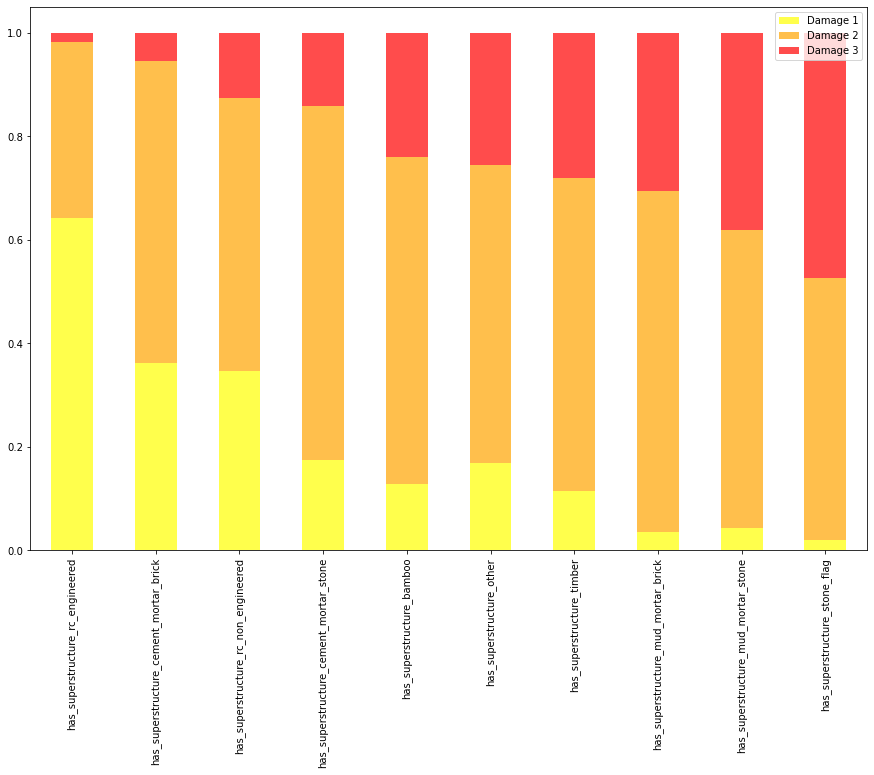

In [20]:
#Plotting Stacked Bar Chart of Damage against Structure
Structure_Damage_norm_sorted = Structure_Damage_norm.sort_values(by=['Damage 3', 'Damage 2', 'Damage 1'])
Structure_Damage_norm_sorted[['Damage 1','Damage 2','Damage 3']].plot(kind='bar', stacked = True, color = ['yellow','orange','red'], alpha = 0.7, figsize = (15,10))

The above data analysis was for the purpose of identifying which structures were more prone to more damage. As can be seen in the unnormalised chart, there is a huge imbalance of data, with more structures made out of mortar stone and timber as compared to the rest, making it hard to see which structure is the weakest. We thus normalised the data, and included it into a stacked bar-chart to see the proportion of damage for different. As we can see, there are clear differences in different structures to the proportion of them that were damaged (e.g. RC Engineered were the 'strongest' structures with the fewest of these buildings experiencing level 3 damage, while Stone Flag structures were the 'weakest', with the largest proportion of these buildings experiencing level 3 damage. Although there is an obvious correlation, we are still unable to directly conclude that the proportion of damage is directly caused by the structures, as there might be coincidences such as Stone Flag buildings being most commonly built around the epicentre of the earthquake, leading to them having the highest proportion of level 3 damage. Thus, we will have to take into other factors such as GEOID in our model. This data analysis consequently shows the need for structure types to be included in our model.

# 5. Data Cleaning

First, we drop land_surface_condition and position as mentioned in the EDA. Furthermore, building_id is also dropped because it does not contribute to the machine learning algorithm and will only serve to confuse the model as it is just a unique identifier and does not describe the building's status.

In [5]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.drop(labels = ['land_surface_condition', 'position'], axis = 1, inplace = True)
df_clean = df.drop(labels = ['land_surface_condition', 'position','building_id'], axis = 1)

Then, we need to perform minor feature engineering in order to augment the 3 levels of  geo_level_id. Columns geo_level_2_id and geo_level_3_id range from 0 to 1427 and 0 to 12567 respectively. These values are inherently categorical, and not continuous. Larger values for these columns do not indicate greater 'intensity', but rather just represent a location on a grid. We can convert it to a categorical d_type and then one-hot-encode it, but this would result in adding 1427 and 12567 additional columns to the dataset, which is undesirable.

Hence, we discretize these two features by creating bins for them, which helps to improve model accuracy by allowing it to spot trends in data more easily.

For geo_level_1_id, since there are only 31 possible values, there is no need for binning.

In [6]:
label2 = list(range(0,10))
label3 = list(range(0,30))
# display(len(label2), len(label3) )

df_clean['geo_level_2_id']=pd.cut(df_clean['geo_level_2_id'], bins=10, labels = label2)
df_clean['geo_level_3_id']=pd.cut(df_clean['geo_level_3_id'], bins=30, labels = label3)

Following this, we now need to one-hot-encode all categorical variables.

In [7]:
# one-hot-encode all categorical variables.
df_clean = pd.get_dummies(df_clean, columns=obj_df.columns, dtype=np.int64)

# one-hot-encode the geo-level-IDs
df_clean = pd.get_dummies(df_clean, columns=['geo_level_1_id','geo_level_2_id','geo_level_3_id'], dtype=np.int64)

There was an outlier category for age of 995 years. We assumed that this was done to categorise all buildings older than 200 years old. However, this is not good for our model, as it assigns a huge weight to this group of buildings. We are not sure of the exact age of these buildings, but also do not want to remove the data to keep as much data as we can. Thus, we have replaced the age 995 with the mean age to not affect the age distribution (instead of replacing it with 0 or removing it)

,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,...,geo_level_3_id_20,geo_level_3_id_21,geo_level_3_id_22,geo_level_3_id_23,geo_level_3_id_24,geo_level_3_id_25,geo_level_3_id_26,geo_level_3_id_27,geo_level_3_id_28,geo_level_3_id_29


<AxesSubplot:xlabel='age', ylabel='count'>

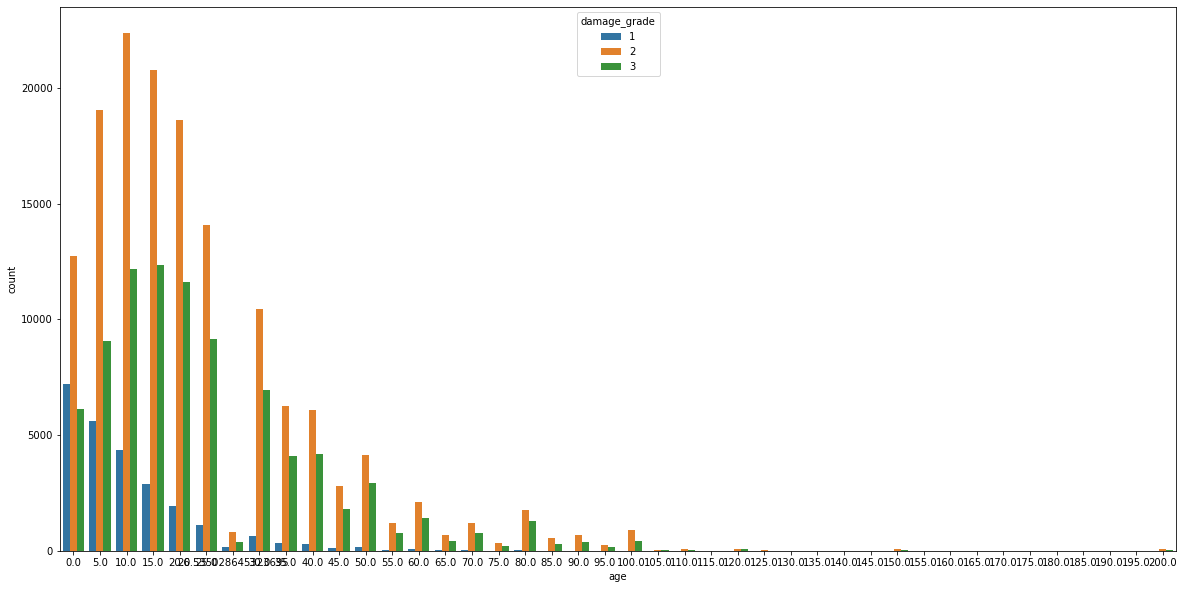

In [8]:
df_clean['age'] = df_clean['age'].replace([995], df_clean['age'].mean() )
display(df_clean[df_clean['age']==995])
len(df_clean)

#Visualizing a countplot for all damage grades across all ages
data1 = pd.DataFrame(df_clean[["damage_grade","age"]])
f = plt.figure(figsize=(20, 10))
sb.countplot(x="age",data=data1,hue="damage_grade")

We then normalise all data before we create the general X and y dataframes which contain the predictor and response variables respectively.

In [9]:
df_clean_norm=(df_clean-df_clean.mean())/df_clean.std()

X = df_clean_norm.drop(labels=['damage_grade'],axis=1).to_numpy()
y = pd.get_dummies(df_clean_norm['damage_grade'].to_numpy())

Finally, we create the training and test sets.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# 6. Models
## Keras
Keras is a library that provides a Python interface for artificial neural networks. We decided to attempt using neural networks for this due to the complexity, non-linearity and amount of features we have from this dataset. Due to the high number of binary features from one-hot encoding, we have chosen the categoriacal-crossentropy loss function. The Adam Optimiser was chosen after perusing different literature online to find a suitable one. We wanted to use F1-score to grade the performance of the model, but Keras does not support F1 score in the epochs. We normalised the data before fitting into the model so as to better fit the softmax activation function which outputs the probability of the 3 different damage classes for that particular building (between 0 and 1). We also attempted to carry out gridsearch to optimise the parameters for the neural network, but for the sake of brevity, this will not be included in the code.

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization

In [29]:
model = Sequential()

model.add(Dense(45, activation='relu', input_dim=129))

model.add(BatchNormalization())

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='elu'))

model.add(Dense(8, activation='selu'))

model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
history = model.fit(X_train, y_train, validation_split=0.33, epochs=20, batch_size=100, verbose=1)

score = model.evaluate(X_test, y_test,verbose=1)

print(score)

Epoch 1/20
1170/1170 [==============================] - 5s 3ms/step - loss: 0.7661 - accuracy: 0.6261 - val_loss: 0.6859 - val_accuracy: 0.6819
Epoch 2/20
1170/1170 [==============================] - 2s 2ms/step - loss: 0.6758 - accuracy: 0.6869 - val_loss: 0.6757 - val_accuracy: 0.6846
Epoch 3/20
1170/1170 [==============================] - 3s 2ms/step - loss: 0.6601 - accuracy: 0.6971 - val_loss: 0.6674 - val_accuracy: 0.6936
Epoch 4/20
1170/1170 [==============================] - 2s 2ms/step - loss: 0.6478 - accuracy: 0.7040 - val_loss: 0.6642 - val_accuracy: 0.6972
Epoch 5/20
1170/1170 [==============================] - 3s 3ms/step - loss: 0.6358 - accuracy: 0.7122 - val_loss: 0.6608 - val_accuracy: 0.6985
Epoch 6/20
1170/1170 [==============================] - 2s 2ms/step - loss: 0.6331 - accuracy: 0.7124 - val_loss: 0.6590 - val_accuracy: 0.7000
Epoch 7/20
1170/1170 [==============================] - 2s 2ms/step - loss: 0.6282 - accuracy: 0.7148 - val_loss: 0.6580 - val_accuracy:

Based on the fit model, the training and testing accuracy are below.

In [30]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train accuracy after 20 epochs: %.3f, Test accuracy after 20 epochs: %.3f' % (train_acc, test_acc))

Train accuracy after 20 epochs: 0.728, Test accuracy after 20 epochs: 0.710


Finally, we plot the performance of our model. 

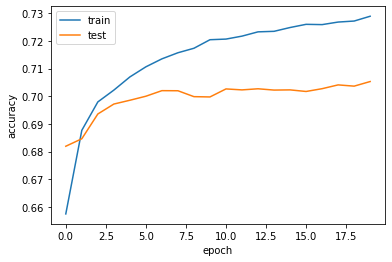

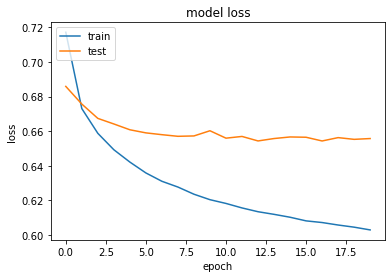

In [31]:
# Plot train/test accuracy vs number of epochs
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot train/test loss vs number of epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


As we can see, based on training on 30 epochs, our train accuracy and loss have stagnated, and the difference between training accuracy and test accuracy has diverged significantly, which is a sign that we are overfitting on the train data - anything learnt by the model after about 15 epochs is not useful. This is further corroborated by the fact that test loss is slightly increasing even though train loss is still on a downward trend - the model has memorised features in the train data that does not contribute to improved accuracy upon testing on the validation set.

## Random Forest

Random forest is a supervised learning algorithm that consists of multiple decision trees. The decision trees are created on randomly selected data and the best solution is selected through voting. 

There are many reasons why we decided on using random forest. Firstly, as it uses multiple decision trees that are largely uncorrelated, it is more accurate and robust compared to an individual decision tree. Next, another important benefit of random forest is the ability to get the feature importance, which can help in fine-tuning the model as we can drop the least important features in later steps. Lastly, it would not be affected by overfitting because the algorithm works by using the average of all the prediction from the different trees.

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

features = df_clean.drop('damage_grade', axis = 1).columns
X = df_clean[features]
Y = df_clean.damage_grade

#Train - Test Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

#Initialising the Random Forest Model and fitting
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

#Prediction of Values
y_pred = rfc.predict(X_test)

# Evaluate predictions
f1 = f1_score(y_test, y_pred, average='micro')
print("F1 Score: %.2f%%" % (f1 * 100.0))

F1 Score: 71.72%


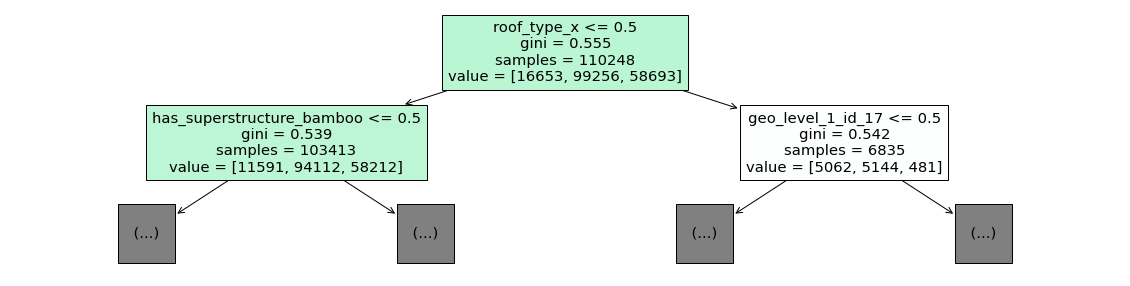

In [17]:
from sklearn import tree
from matplotlib import pyplot as plt

#Plotting decision tree
plt.figure(figsize=(20,5))
_ = tree.plot_tree(rfc.estimators_[0], feature_names=features, filled=True, max_depth=1)

This figure shows the first level of the first Decision Tree used by the Random Forest, which expands to include more features we have input into the classifier model. This is repeated for multiple times across different data to improve accuracy and give a final score.

Here, we go on to check the most important features ranked by the Random Forest Classifier model.

In [33]:
#Listing the features, sorted by importance
importance_rf = pd.DataFrame({"Features":features, "Importance_RF":rfc.feature_importances_}).sort_values(by='Importance_RF', ascending = False).head(129)
display(importance_rf)

,Features,Importance_RF
1,age,0.134268
2,area_percentage,0.120855
3,height_percentage,0.058837
75,geo_level_1_id_17,0.056169
15,count_families,0.026612
...,...,...
23,has_secondary_use_health_post,0.000051
48,plan_configuration_m,0.000039
47,plan_configuration_f,0.000029
24,has_secondary_use_gov_office,0.000025


In [34]:
# Using the 110 most important features
rfc_new = importance_rf["Features"].head(110)
X = df_clean[rfc_new]
Y = df_clean.damage_grade

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Reftting the model
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

# Evaluate predictions
f1 = f1_score(y_test, y_pred, average='micro')
print("F1 Score: %.2f%%" % (f1 * 100.0))

F1 Score: 71.75%


We can see that the F1 score has increased slightly from dropping the last 19 features (from 71.72% to 71.75%)

## XGBoost

Gradient Boosting is a method that uses many smaller decision trees or "weak learners", similar to that of Random Forest. However, the difference is that Gradient Boosting does this sequentially, building on the previous weak learner and adjusting weight along the way. This leads to a overall thoroughness of the data, but also takes significantly longer. XGBoost is an enhanced Gradient Boosting Method, that incorporates regularization and allows parallel processing, making it much faster and more complete than regular Gradient Boosting Models.

We can visualize a plot of one of the weak learners with max_depth set to 2. 

D:\ana\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:32:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<Figure size 864x864 with 0 Axes>

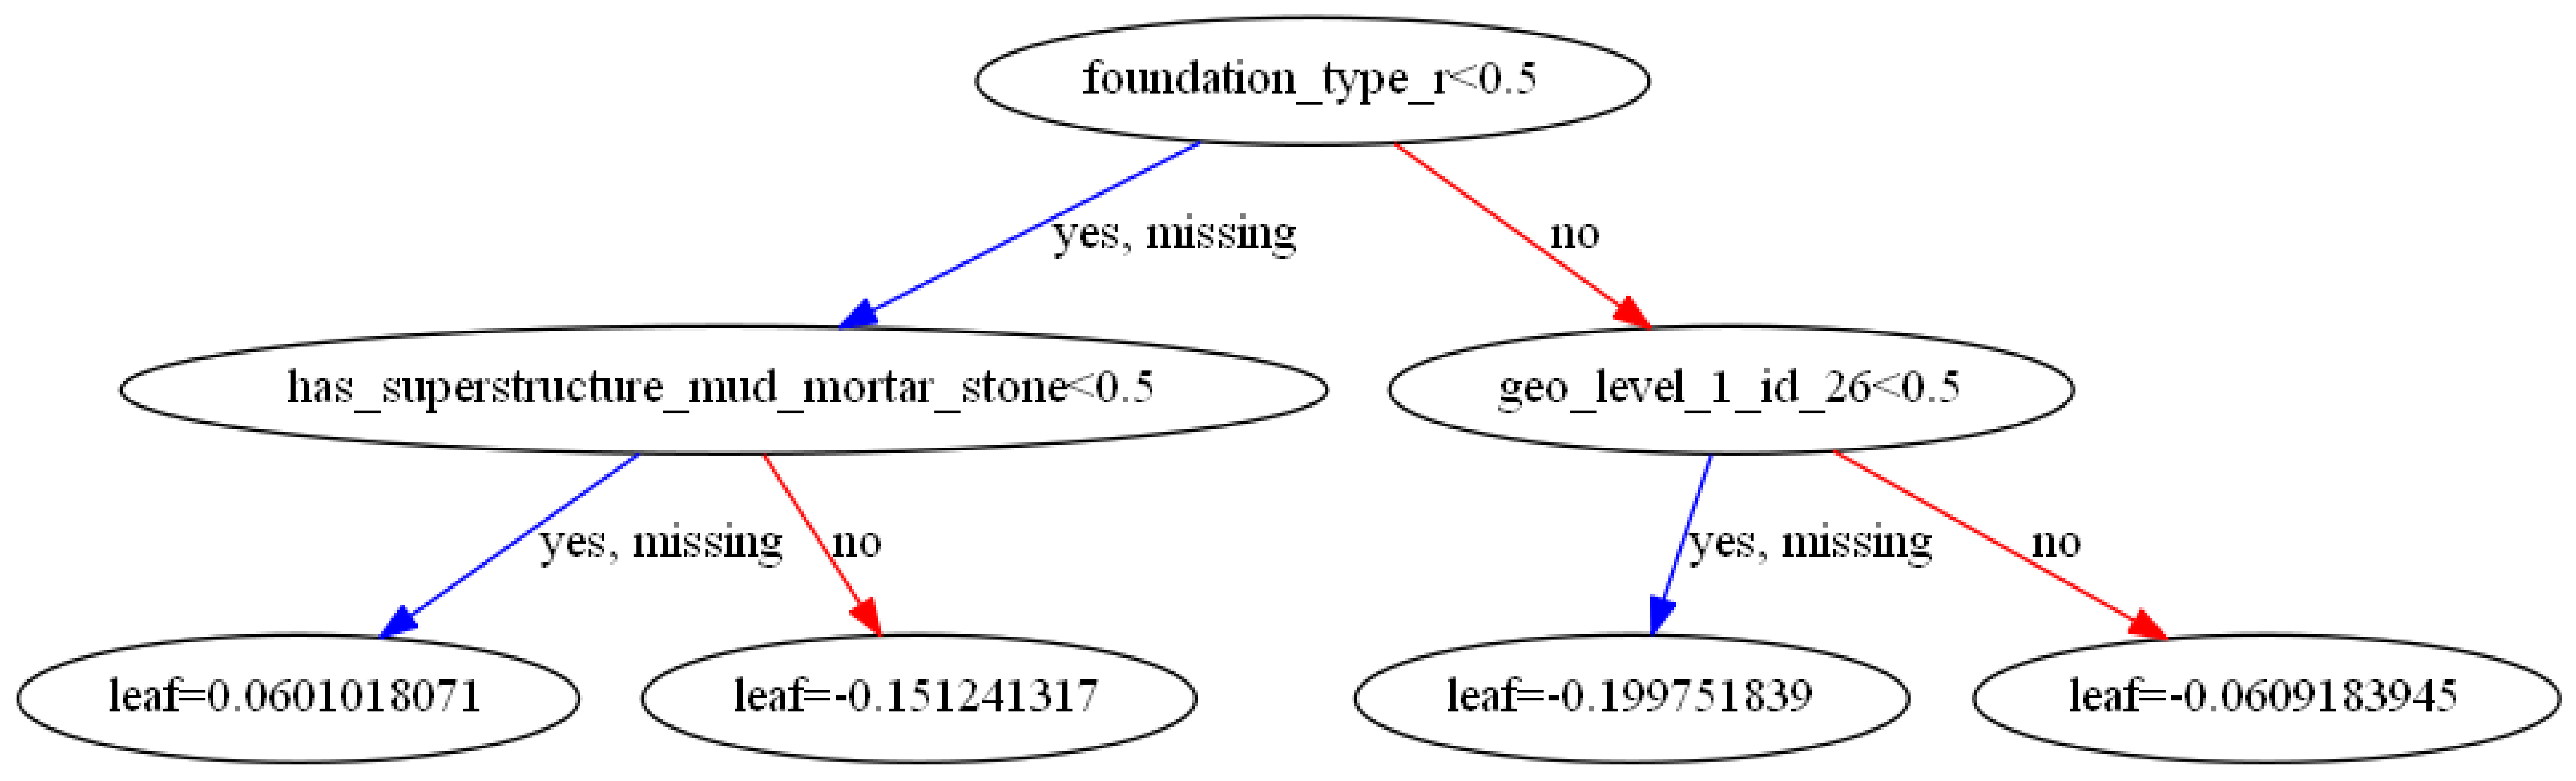

In [85]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# split data into X and y
features = df_clean.drop('damage_grade', axis = 1).columns
X = df_clean[features]
Y = df_clean.damage_grade

#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

# fit model to training data with max_depth set as 2 for graphviz
model = XGBClassifier(max_depth=2)
model.fit(X_train, y_train)

# Plotting the first decision tree or weak learner
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
xgb.plot_tree(model,num_trees=0,filled=True)
plt.show()

In [52]:
#Training the model properly
model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
f1 = f1_score(y_test, y_pred, average='micro')
print("F1 Score: %.2f%%" % (f1 * 100.0))

[16:39:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 Score: 70.93%


The baseline F1 score is lower than that of Random Forest (70.93% against 71.72%), but we can further process and retrain the model.

In [53]:
#Listing down the most important features
importance_xgb = pd.DataFrame({"Features":features, "Importance_XGB":model.feature_importances_}).sort_values(by='Importance_XGB', ascending = False)
print(importance_xgb)

                         Features  Importance_XGB
75              geo_level_1_id_17        0.139305
29              foundation_type_r        0.102774
37            ground_floor_type_v        0.046979
79              geo_level_1_id_21        0.041501
84              geo_level_1_id_26        0.037544
..                            ...             ...
48           plan_configuration_m        0.000441
47           plan_configuration_f        0.000380
25   has_secondary_use_use_police        0.000000
23  has_secondary_use_health_post        0.000000
21       has_secondary_use_school        0.000000

[129 rows x 2 columns]


In [54]:
#Taking only first 110 variables
xgb_important = importance_xgb["Features"].head(110)
X = df_clean[xgb_important]
Y = df_clean.damage_grade

#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
f1 = f1_score(y_test, y_pred, average='micro')
print("F1 Score: %.2f%%" % (f1 * 100.0))

D:\ana\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:41:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 Score: 70.98%


Implementing the same technique and using the more important features, we see an improvement from 70.93% to 70.98%. We can further finetune the model by optimising the hyperparameters that XGBoost has.

GridSearch allows us to iterate between the different hyperparameters of a model to identify the hyperparameters that give the best score specific to the model and the dataset. In this case, we have chosen to iterate amongst `max_depth` for XGBoost to identify what is the optimal depth to use for this dataset. We have only chosen to do 3 Cross Validations, and 3 different Max Depths as the time taken to run the XGBoost exponentially increases based on the number of hyperparameters, hyperparameter options and  cross validations chosen. If we were given the time, we can carry out GridSearch on more hyperparameters, more options for each hyperparameter, and with more cross validations.

In [204]:
#Setting parameters to search
param_1 = {'max_depth' : [10,20,40]}

#Initiate GridSearchCV
xgb_gs = GridSearchCV(model, param_1, n_jobs=4,verbose=5, scoring='f1_micro', cv=3)

#Fitting the revised model
xgb_gs.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   9 | elapsed:  5.6min remaining:  7.1min
[Parallel(n_jobs=4)]: Done   6 out of   9 | elapsed:  7.0min remaining:  3.5min
[Parallel(n_jobs=4)]: Done   9 out of   9 | elapsed: 14.8min finished


[03:06:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=12,
                                     num_parallel_tree=1,
                                     objective='multi:softprob', random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=None, subsample=1,
                     

In [206]:
#Predicting values for revised model
y_pred = xgb_gs.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
f1 = f1_score(y_test, y_pred, average='micro')
print("F1 Score: %.2f%%" % (f1 * 100.0))

F1 Score: 72.41%


# 7. Conclusion

After fitting the data on the 3 models, we have identified that XGBoost + Gridsearch is the most accurate in determining the damage level of the buildings with a F1 Score of 72.4%. We have also identified from the Random Forest and XGBoost that the top few parameters that help in categorising these buildings to their damage categories are: 

| Important Features | Random Forest | XGBoost |
| :-: | :-: | :-: |
| **1)** | Age | geo_level_1_id_17 |
| **2)** | Area_Percentage | foundation_type_r |
| **3)** | Height_Percentage | ground_floor_type_v |
| **4)** | geo_level_1_id_17 | geo_level_1_id_21 |
| **5)** | count_families | geo_level_1_id_26 |

There is a repeating variable of Geo Level 1 ID 17, which might indicate that the earthquake epicentre is in that particular grid, with Geo Level 1 ID 21 and 26 in the area. Age of buildings and the area that they occupy, their height, foundation and ground floor type  should also be considered in the future by building planners in order to create safer buildings for citizens to stay in. Although these features are not proven to directly affect the stability of the building, their correlation indicates some attention should be paid towards them. Through this Exploratory Data Analysis and Machine Learning, we hope that some new insight has been gained on buildings and factors that affect their damage during earthquakes.

Neural Networks (NN) have been shown to work better on unsupervised data, with decision trees better with such forms of supervised data. NN are also better at sieving out the ingrained patterns in a dataset which lead to the result. It may simply be the case that this particular dataset's data points were not detailed enough for the NN to properly process and carry out deep learning to improve it's accuracy. 

It is also helpful to use Random Forest/XGB in this case as the features are still able to be interpreted by us, which is more useful in the long run in improving the safety of housing in earthquakes. They also allow for high customisability due to the hyperparameters that can be tuned by us to achieve higher accuracy. However, to optimise all the different hyperparameters using RandomSearch or GridSearch requires significant processing power and time.